In [1]:
import pandas as pd

In [2]:
new_store = pd.read_hdf("singlepi_e100GeV_pu200.h5")

In [3]:
new_store.head()

,event,type,layer,E,eta,phi
0,1.0,0.0,1.0,0.043731,-2.749128,-0.011484
1,1.0,0.0,1.0,0.026995,-2.768147,-0.044839
2,1.0,0.0,1.0,0.020516,-2.758605,0.068834
3,1.0,0.0,1.0,0.211097,-2.771649,-0.128464
4,1.0,0.0,1.0,0.053989,-2.834935,-0.170604


In [4]:
new_store.describe()

,event,type,layer,E,eta,phi
count,1.231335e+07,1.231335e+07,1.231335e+07,1.231335e+07,1.231335e+07,1.231335e+07
mean,5.037100e+01,1.975091e-03,1.375095e+01,1.755728e-01,-2.398812e-03,-3.070737e-03
std,2.880447e+01,4.439809e-02,9.867561e+00,4.467416e-01,2.334440e+00,1.813426e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,5.663958e-03,-3.218457e+00,-3.141593e+00
25%,2.500000e+01,0.000000e+00,6.000000e+00,3.263597e-02,-2.293262e+00,-1.574572e+00
50%,5.000000e+01,0.000000e+00,1.200000e+01,6.803667e-02,-1.497489e+00,-6.269399e-03
75%,7.500000e+01,0.000000e+00,2.100000e+01,1.626605e-01,2.289538e+00,1.560862e+00
max,1.000000e+02,1.000000e+00,5.000000e+01,9.815934e+01,3.218457e+00,3.141593e+00


In [5]:
len(new_store)

12313354

In [9]:
new_store.corr()

,event,type,layer,E,eta,phi
event,1.000000,0.000114,0.000188,-0.000299,-0.000264,-0.001199
type,0.000114,1.000000,0.056323,0.023481,0.035862,0.000703
layer,0.000188,0.056323,1.000000,0.083054,0.001172,-0.000239
E,-0.000299,0.023481,0.083054,1.000000,0.001318,-0.000007
eta,-0.000264,0.035862,0.001172,0.001318,1.000000,0.000666
phi,-0.001199,0.000703,-0.000239,-0.000007,0.000666,1.000000


In [13]:
df_no_pileup = new_store[new_store.type == 1].copy()
len(df_no_pileup)

24320

In [24]:
df_no_pileup[['E','eta','phi']].describe()

,E,eta,phi
count,24320.000000,24320.000000,24320.000000
mean,0.411378,1.879514,0.025574
std,1.353337,0.092043,0.328819
min,0.008092,1.393670,-2.991493
25%,0.045809,1.839008,-0.256525
50%,0.090066,1.878699,-0.017841
75%,0.225799,1.916395,0.306910
max,43.521908,3.052492,1.449369


In [23]:
df_pileup = new_store[new_store.type == 0].copy()
len(df_pileup)
df_pileup[['E','eta','phi']].describe()

,E,eta,phi
count,1.228903e+07,1.228903e+07,1.228903e+07
mean,1.751061e-01,-6.123117e-03,-3.127424e-03
std,4.429879e-01,2.335242e+00,1.815160e+00
min,5.663958e-03,-3.218457e+00,-3.141593e+00
25%,3.263519e-02,-2.294610e+00,-1.577354e+00
50%,6.803667e-02,-1.506239e+00,-6.166679e-03
75%,1.625321e-01,2.290881e+00,1.563887e+00
max,9.815934e+01,3.218457e+00,3.141593e+00


In [7]:
import numpy as np
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
import h5py
import pandas as pd


In [26]:
df_no_pileup = store[store.type == 1].copy()

df_no_pileup = store[store.type == 1].copy()
df_pileup = store[store.type == 0].copy()

df_no_pileup[['E','eta','phi']].describe()

df_pileup[['E','eta','phi']].describe()

gby = store.groupby(['layer'])

layer1= gby.get_group(1).copy()
layer1.drop(['event','layer'],1,inplace=True)

layer20= gby.get_group(20).copy()
layer20.drop(['event','layer'],1,inplace=True)

layer49= gby.get_group(49).copy()
layer49.drop(['event','layer'],1,inplace=True)

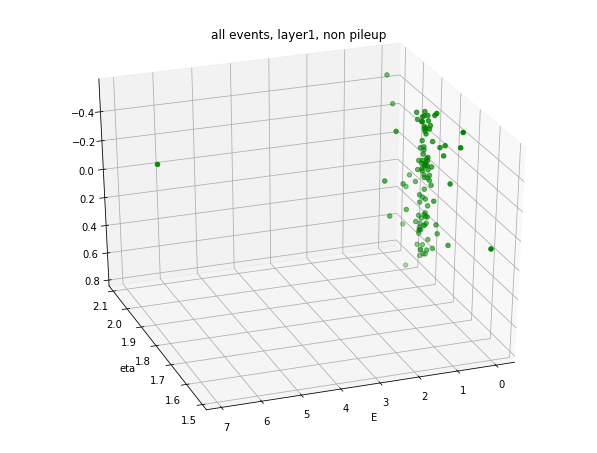

In [22]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer1[layer1.type == 1]['E'], layer1[layer1.type == 1]['eta'], layer1[layer1.type == 1]['phi'], c='G')
py.xlabel("E")
py.ylabel("eta")
#zlanel phi
py.title("all events, layer1, non pileup")
py.show()

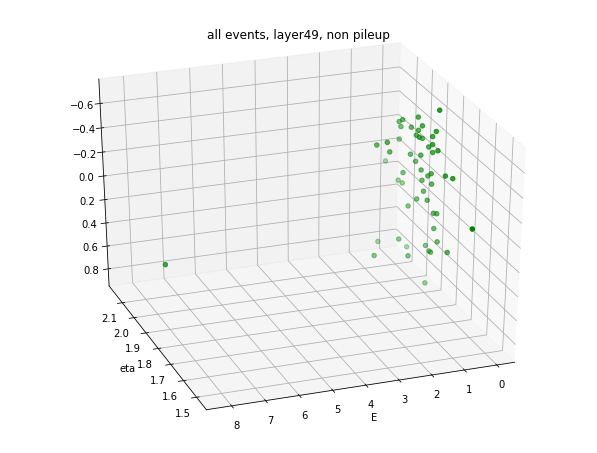

In [24]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer49[layer49.type == 1]['E'], layer49[layer49.type == 1]['eta'], layer49[layer49.type == 1]['phi'], c='G')
py.xlabel("E")
py.ylabel("eta")
py.title("all events, layer49, non pileup")
#zlanel phi
py.show()

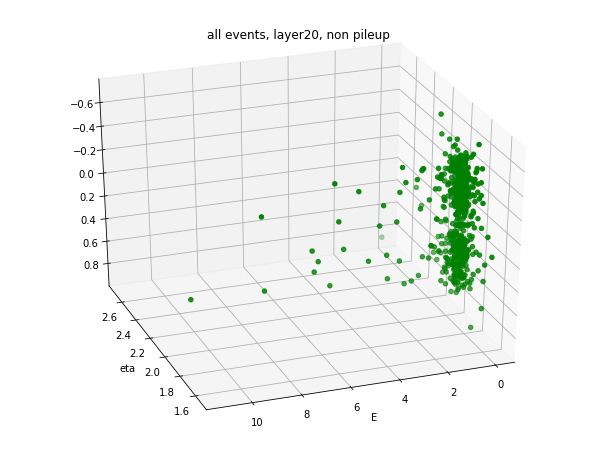

In [27]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer20[layer20.type == 1]['E'], layer20[layer20.type == 1]['eta'], layer20[layer20.type == 1]['phi'], c='G')
py.xlabel("E")
py.ylabel("eta")
py.title("all events, layer20, non pileup")
#zlanel phi
py.show()

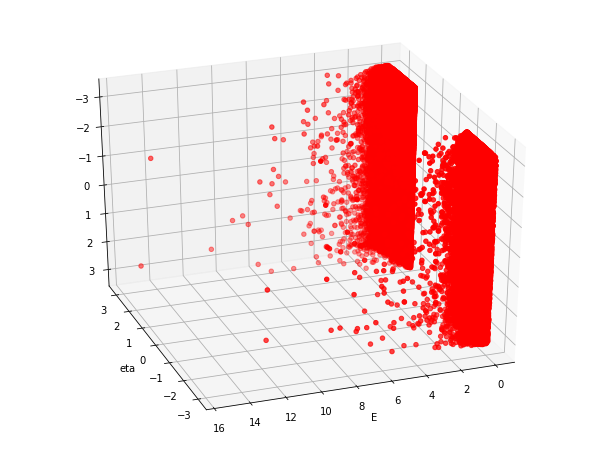

In [16]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer1[layer1.type == 0]['E'], layer1[layer1.type == 0]['eta'], layer1[layer1.type == 0]['phi'], c='r')
py.xlabel("E")
py.ylabel("eta")
py.show()

In [ ]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer49[layer49.type == 1]['E'], layer49[layer49.type == 1]['eta'], layer49[layer49.type == 1]['phi'], c='G')
py.xlabel("E")
py.ylabel("eta")
py.title("all events, layer49, non pileup")
#zlanel phi
py.show()

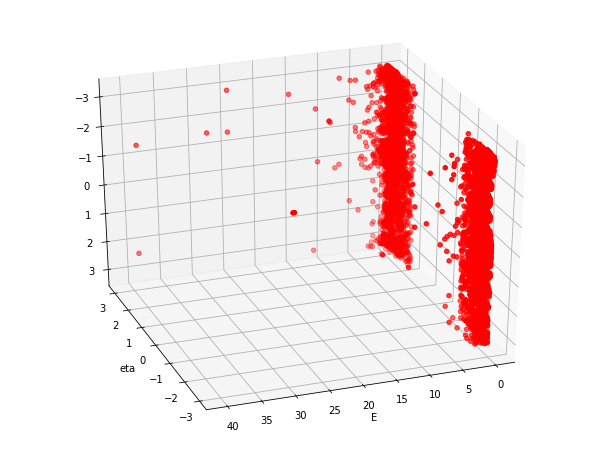

In [20]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer49[layer49.type == 0]['E'], layer49[layer49.type == 0]['eta'], layer49[layer49.type == 0]['phi'], c='r')
py.xlabel("E")
py.ylabel("eta")
py.show()

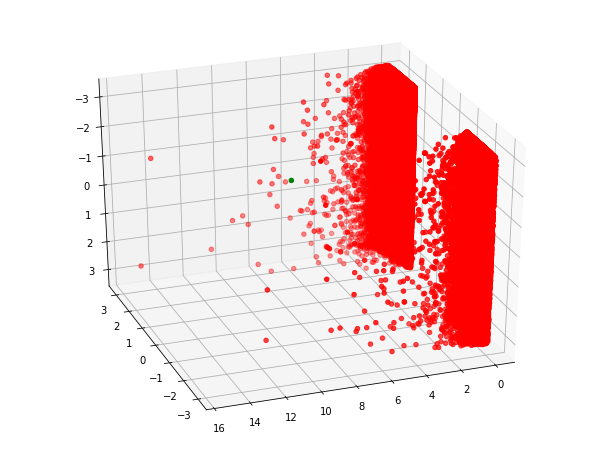

In [13]:

fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(layer1[layer1.type == 1]['E'], layer1[layer1.type == 1]['eta'], layer1[layer1.type == 1]['phi'], c='G')
ax.scatter(layer1[layer1.type == 0]['E'], layer1[layer1.type == 0]['eta'], layer1[layer1.type == 0]['phi'], c='r')
py.xlabel("E")
py.ylabel("eta")
py.show()

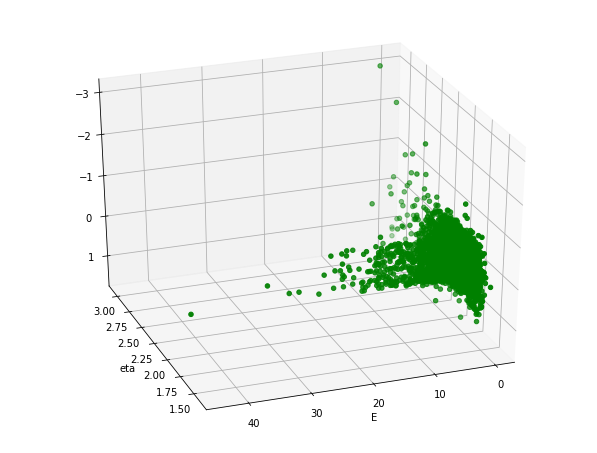

In [28]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(store[store.type == 1]['E'], store[store.type == 1]['eta'], store[store.type == 1]['phi'], c='g')
py.xlabel("E")
py.ylabel("eta")

py.show()


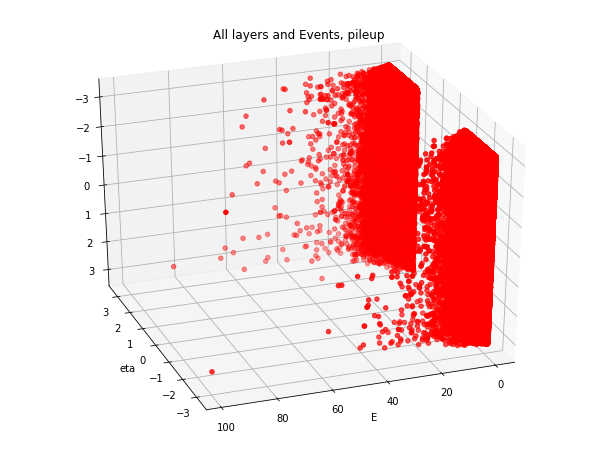

In [29]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(store[store.type == 0]['E'], store[store.type == 0]['eta'], store[store.type == 0]['phi'], c='r')
py.xlabel("E")
py.ylabel("eta")
py.title("All layers and Events, pileup")
py.show()


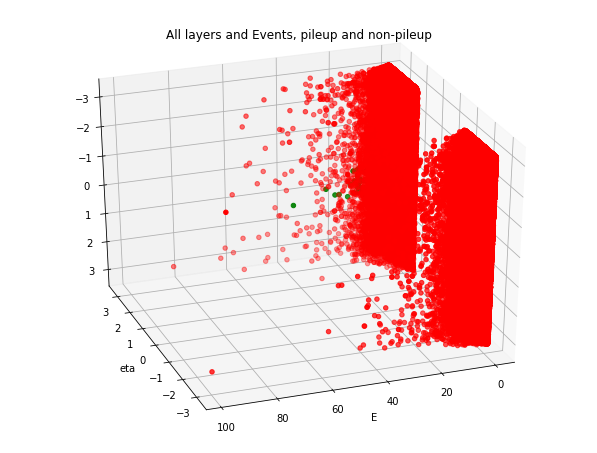

In [31]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(store[store.type == 0]['E'], store[store.type == 0]['eta'], store[store.type == 0]['phi'], c='r')
ax.scatter(store[store.type == 1]['E'], store[store.type == 1]['eta'], store[store.type == 1]['phi'], c='g')
py.xlabel("E")
py.ylabel("eta")
py.title("All layers and Events, pileup and non-pileup")
py.show()